# Import Libraries

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets ,transforms
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable
import torchvision

ModuleNotFoundError: No module named 'torch'

# Load net and predict

Image Label:S
Predicted Label:S


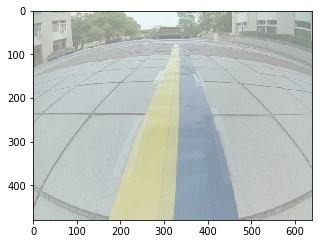

In [3]:
# First you need to create a model to load state_dict
class Temp_Model(nn.Module):
    def __init__(self):
        super(Temp_Model, self).__init__()
        self.conv1 = nn.Sequential(              
            nn.Conv2d(
                in_channels=3,              
                out_channels=32,            
                kernel_size=4,              
                stride=1,                   
                padding=0,                  
            ),                                                 
            nn.MaxPool2d(kernel_size=2, stride=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=0,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=0,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.conv4 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=1,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.fc1 = nn.Linear(34048, 200)
        self.fc2 = nn.Linear(200, 3)
    

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = Temp_Model().cuda()
model.load_state_dict(torch.load('/home/austin/trailnet-testing-Pytorch/2020_summer/src/deep_learning/src/trailnet.pth')) # load state_dict

test_data = datasets.ImageFolder(
    '/home/austin/trailnet-testing-Pytorch/2020_summer/src/deep_learning/data/Lane_data/test_data',
    transform = transforms.Compose([transforms.ToTensor()])                         
)

test_single_loader = torch.utils.data.DataLoader(test_data, batch_size=1,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20,shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(test_single_loader)
images, labels = dataiter.next()
images = images.cuda()
labels = labels.cuda()
outputs = model(Variable(images))
_,predicted = torch.max(outputs.data,1)

if labels == 0:
    print('Image Label:L')
if labels == 1:
    print('Image Label:R')
if labels == 2:
    print('Image Label:S')
if predicted == 0:
    print('Predicted Label:L')
if predicted == 1:
    print('Predicted Label:R')
if predicted == 2:
    print('Predicted Label:S')

imshow(torchvision.utils.make_grid(images))

# Accuracy evaluation

In [4]:
print('Accuracy testing...')

correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    with torch.no_grad():
        outputs = model(Variable(images))
        _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy testing...
Accuracy of the network on the test images: 95 %
